# Phase 5: Comparing Regressors

## 1. Import libraries

In [5]:
! pip install lazypredict


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

## 2. Load the data set

In [7]:
data_AB_EPVS_ALPS_demo = pd.read_csv("/Users/dasmaster/BIL Lab Projects/project1/AB/data_AB_EPVS_ALPS_demo_preprocessed.csv")

In [8]:
X = data_AB_EPVS_ALPS_demo.drop(labels = ["DX_encoded"], axis = 1)
Y = data_AB_EPVS_ALPS_demo["DX_encoded"]

## 3. Data pre-processing

In [9]:
# Examine X dimension
X.shape

(277, 51)

In [10]:
# Remove the low variance features, because the features identified as low variance are essentially not changing (constant) and will not improve the regression model
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X = selection.fit_transform(X)
X.shape

(277, 47)

In [11]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## 4. Compare ML algorithms

In [12]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric= None)
train, test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:02<00:00, 20.31it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2915
[LightGBM] [Info] Number of data points in the train set: 221, number of used features: 47
[LightGBM] [Info] Start training from score 0.796380
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [13]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,-5.58,0.04,0.90,0.14
LassoLarsIC,-5.69,0.03,0.91,0.01
LassoLarsCV,-5.72,0.02,0.91,0.02
LassoCV,-5.72,0.02,0.91,0.15
LarsCV,-5.73,0.02,0.92,0.02
ElasticNetCV,-5.77,0.02,0.92,0.13
ExtraTreesRegressor,-5.80,0.01,0.92,0.09
BaggingRegressor,-5.83,0.01,0.92,0.04
RandomForestRegressor,-5.83,0.01,0.92,0.25


In [14]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,-5.58,0.04,0.90,0.14
LassoLarsIC,-5.69,0.03,0.91,0.01
LassoLarsCV,-5.72,0.02,0.91,0.02
LassoCV,-5.72,0.02,0.91,0.15
LarsCV,-5.73,0.02,0.92,0.02
ElasticNetCV,-5.77,0.02,0.92,0.13
ExtraTreesRegressor,-5.80,0.01,0.92,0.09
BaggingRegressor,-5.83,0.01,0.92,0.04
RandomForestRegressor,-5.83,0.01,0.92,0.25


## 5. Data visualization of model performance

[(0.0, 10.0)]

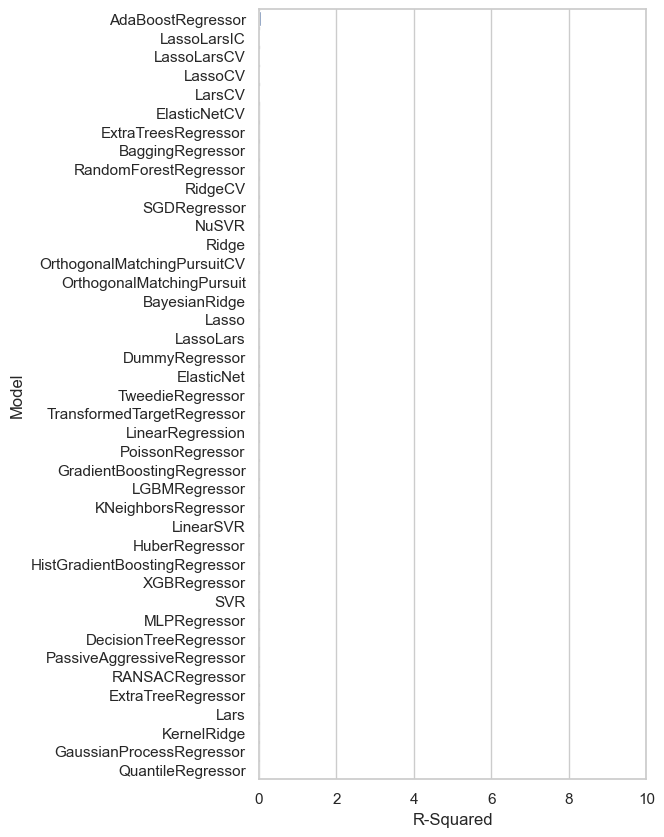

In [15]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared'] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize = (5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y = train.index, x = "R-Squared", data = train)
ax.set(xlim = (0, 10))

[(0.0, 10.0)]

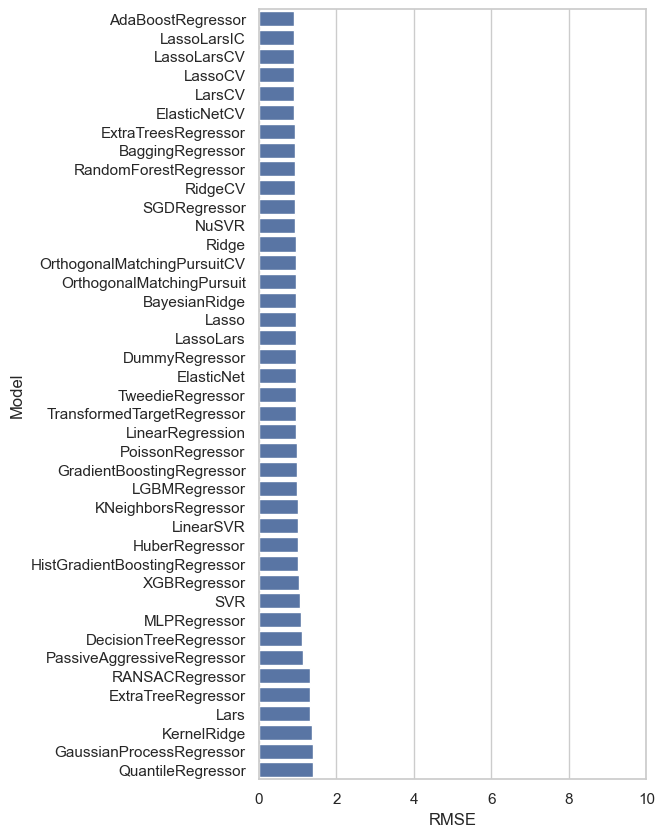

In [16]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y = train.index, x = "RMSE", data = train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

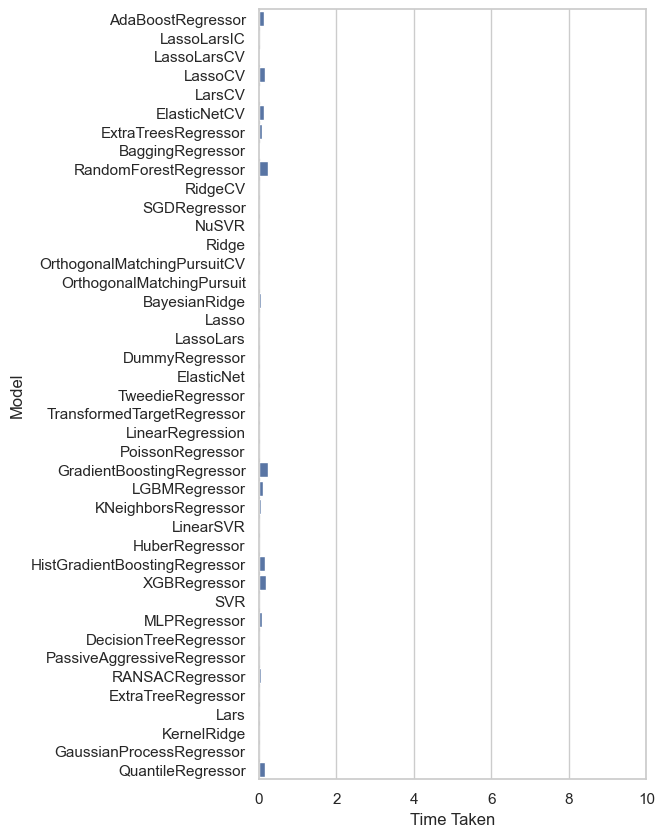

In [17]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y = train.index, x = "Time Taken", data=train)
ax.set(xlim=(0, 10))